# BTC Analysis
<p>This notebook focuses on the analysis of a sample chosen cryptocurrency, Bitcoin - <code>BTC</code>. <em>Live data</em> was gotten from yahoo data using pandas datareader, <em>descriptive analysis</em> was carried out, the <em>moving average</em> was plotted, the data was then <em>scaled</em> and <em>trained</em> using a <em>deep learning model</em>. Evaluation of the model was done using <em>RMSE</em> value and <em>R2 score</em>.
</p>

### Data extraction

In [1]:
# importing necessary libraries

# to hide version warnings
import warnings
warnings.filterwarnings('ignore')

# for data extraction and visualization
import pandas as pd
import pandas_datareader as pdd
import datetime as dt
import matplotlib.pyplot as plt

# for data scaling and transformation
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# for model development and evaluation
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score as r2

In [2]:
# This extracts the BTC cryptocurrency 
cryptocurrency = 'BTC'
currency = 'USD'

In [3]:
# This sets the date
start = '2014-01-01'
end = dt.datetime.now()

In [4]:
# This calls the data from yahoo finance using pandas data reader and saves the live data in the 'data' variable
data = pdd.DataReader(f'{cryptocurrency}-{currency}', 'yahoo', start, end)

In [5]:
# The first 5 records of the BTC data
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


### Descriptive Analysis

In [6]:
# This shows the number of rows and columns present in the data
data.shape

(2884, 6)

In [7]:
# This gives more infomation about the data. It shows the number of records, data type of each column and the number of values
# in each column which shows that there are no missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2884 entries, 2014-09-17 to 2022-08-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2884 non-null   float64
 1   Low        2884 non-null   float64
 2   Open       2884 non-null   float64
 3   Close      2884 non-null   float64
 4   Volume     2884 non-null   int64  
 5   Adj Close  2884 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 157.7 KB


In [8]:
# This shows statistical values (mean, standard deviation, minimum and maximum values, median, etc) on each of the columns
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2884.000000,2884.000000,2884.000000,2884.000000,2.884000e+03,2884.000000
mean,12873.517685,12183.052553,12547.409336,12553.624635,1.559205e+10,12553.624635
std,16948.138055,16027.909637,16521.668010,16517.608574,1.987688e+10,16517.608574
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,655.989975,635.731018,640.825226,641.491241,8.785958e+07,641.491241
50%,6765.564941,6505.459961,6619.229980,6624.020020,6.066685e+09,6624.020020
75%,12032.536133,11556.733887,11778.659424,11794.601074,2.662040e+10,11794.601074
max,68789.625000,66382.062500,67549.734375,67566.828125,3.509679e+11,67566.828125


<h5>Observations</h5>

<p>In the descriptive analysis section, <code>BTC</code> started in September 2014 and the current data contains 2884 records i.e the prices of bitcoin have been rising and falling for 2884 days (almost 8 years). It is also a time series (sequential) data.</p>
<p>The data also contains no missing values and it's purely numerical therefore, no data cleaning or encoding is required. Furthermore, It was discovered that the lowest closing price of <code>BTC</code> so far was 178 dollars and it has its highest price at $67,566.</p>


### Exploratory Data Analysis (EDA)

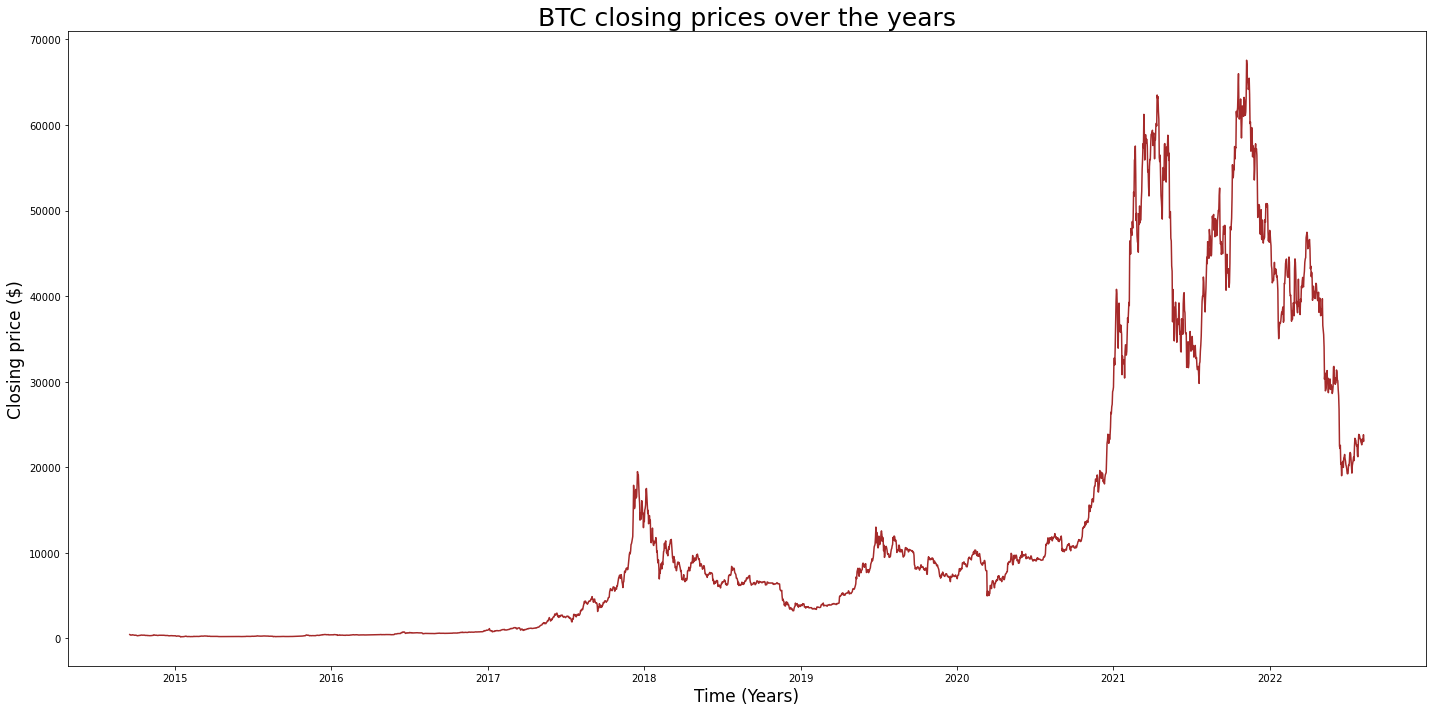

In [9]:
# This shows the closing prices of BTC over the years from 2014-09-17 till the current day
plt.figure(figsize=(20,10))

plt.plot(data.Close, color='brown')
plt.xlabel('Time (Years)', fontsize=17)
plt.ylabel('Closing price ($)', fontsize=17)
plt.title('BTC closing prices over the years', fontsize=25)

plt.tight_layout()
plt.show()


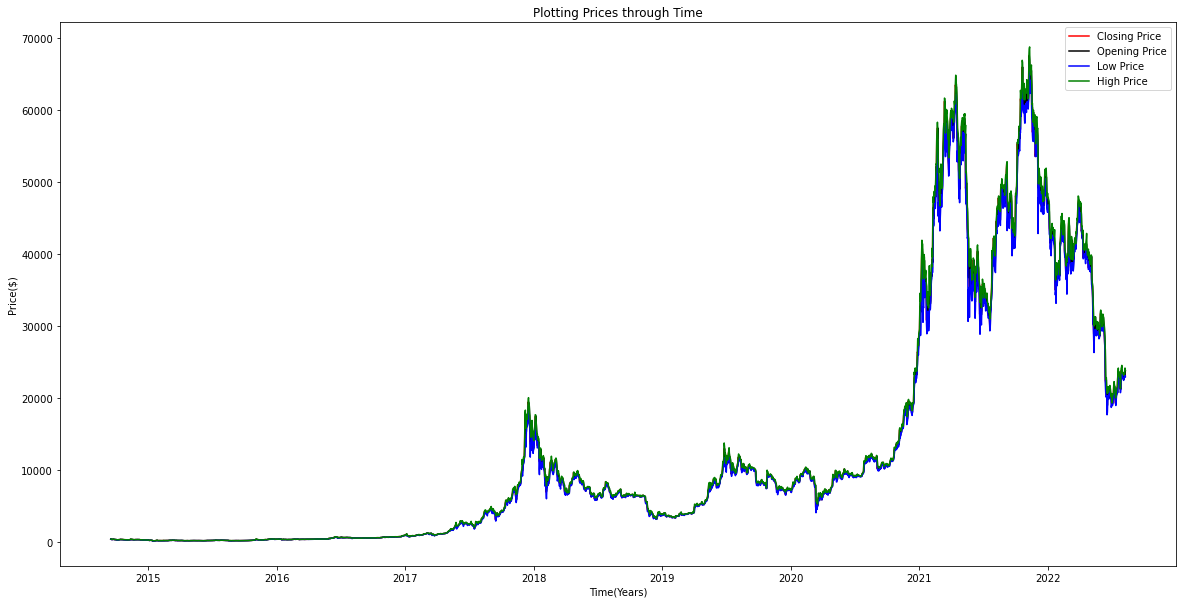

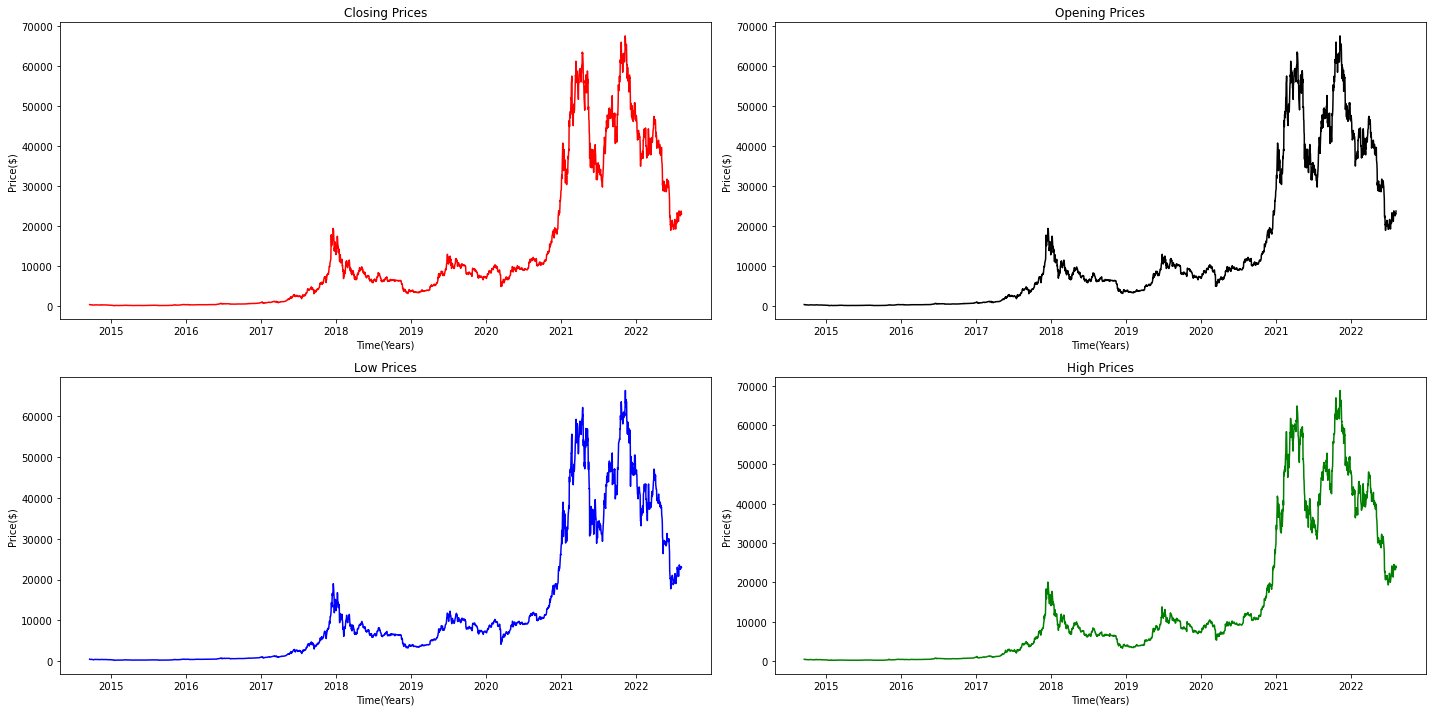

In [10]:
# this visualizes the opening, high, low and closing prices together and separately to show the distinction.
plt.figure(figsize=(20,10))

plt.plot(data.Close, color='red', label='Closing Price')
plt.plot(data.Open, color='black', label='Opening Price')
plt.plot(data.Low, color='blue', label='Low Price')
plt.plot(data.High, color='green',label='High Price')
plt.xlabel('Time(Years)')
plt.ylabel('Price($)')
plt.title('Plotting Prices through Time')
plt.legend()


plt.subplots(2,2, figsize=(20,10))

sub1 = plt.subplot(2,2,1)
plt.plot(data.Close, color='red', label='Closing Price')
plt.xlabel('Time(Years)')
plt.ylabel('Price($)')
plt.title('Closing Prices')

sub2 = plt.subplot(2,2,2)
plt.plot(data.Open, color='black', label='Opening Price')
plt.xlabel('Time(Years)')
plt.ylabel('Price($)')
plt.title('Opening Prices')

sub3 = plt.subplot(2,2,3)
plt.plot(data.Low, color='blue', label='Low Price')
plt.xlabel('Time(Years)')
plt.ylabel('Price($)')
plt.title('Low Prices')

sub4 = plt.subplot(2,2,4)
plt.plot(data.High, color='green',label='High Price')
plt.xlabel('Time(Years)')
plt.ylabel('Price($)')
plt.title('High Prices')


plt.tight_layout()
plt.show()

In [11]:
# Setting variables for moving average 
# Moving average helps to smoothen price flunctuations to help differentiate between the flunctuations and the real trend.
# It can also help to forecast future prices.

MA100 = data.Close.rolling(100).mean()
MA200 = data.Close.rolling(200).mean()
MA300 = data.Close.rolling(300).mean()
MA400 = data.Close.rolling(400).mean()
MA500 = data.Close.rolling(500).mean()
MA600 = data.Close.rolling(600).mean()

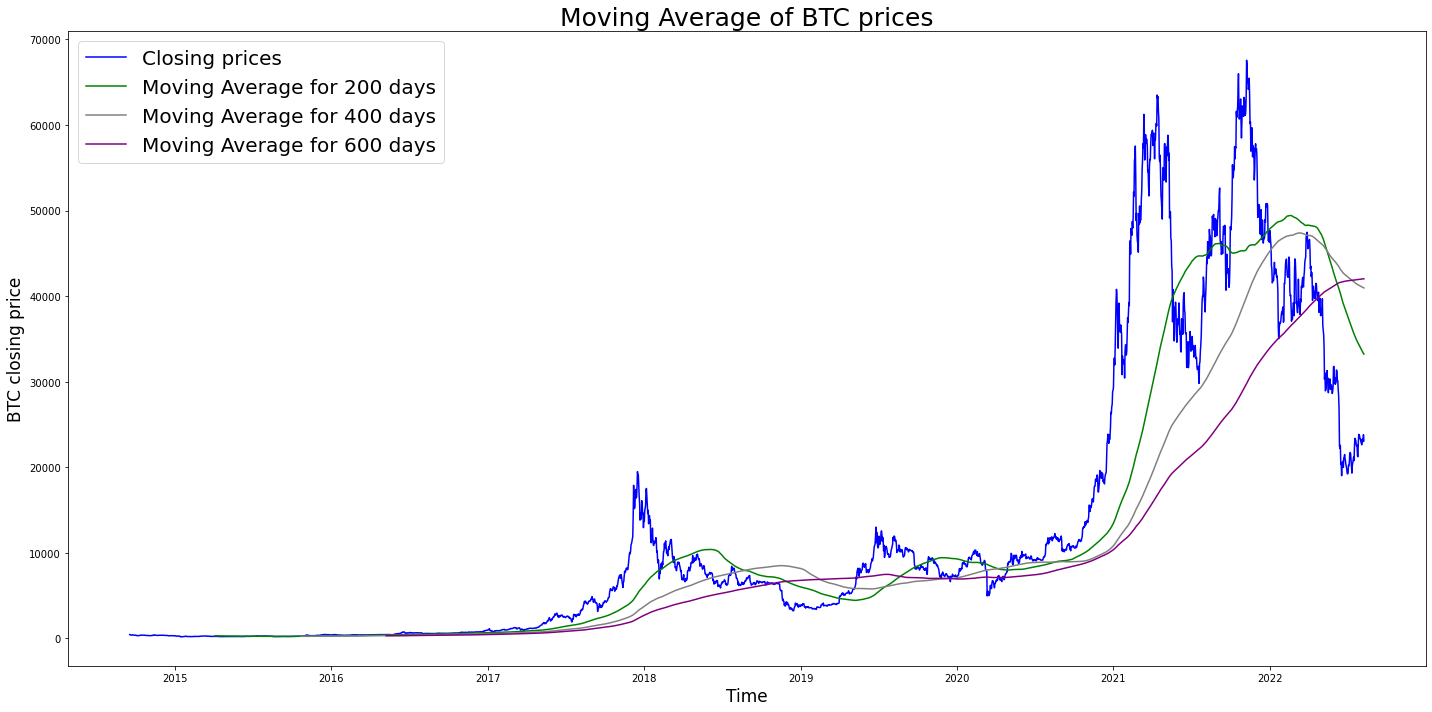

In [12]:
# This visualizes the moving average from 100 to 600 days

plt.figure(figsize=(20,10))

plt.plot(data.Close, color='blue', label='Closing prices')
# plt.plot(MA100, 'red', label='Moving Average for 100 days')
plt.plot(MA200, 'green', label='Moving Average for 200 days')
# plt.plot(MA300, 'black', label='Moving Average for 300 days')
plt.plot(MA400, 'grey', label='Moving Average for 400 days')
# plt.plot(MA500, 'brown', label='Moving Average for 500 days')
plt.plot(MA600, 'purple', label='Moving Average for 600 days')


plt.xlabel('Time', fontsize=17)
plt.ylabel('BTC closing price', fontsize=17)
plt.title('Moving Average of BTC prices', fontsize=25)

plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()


<h5>Observations</h5>

<p>This section focuses on visualising the trend of <code>BTC</code> opening, high, low, closing prices and seasonality in the data. In the first visualization, it was discovered that bitcoin started to rise significantly in late-2020 and early-2021. It rose the highest in late-2021 and according to the moving average visualization, it seems to be dropping in 2022. The purpose of constructing the moving average is to smoothen out the prices and filter out the noise especially from the price fluctuations.</p>
<p>The visualization with subplots show the prices(open, close, low and high) altogether and the subplots show each attribute separately. This was done because it may seem all the prices are the same but the big plot shows that they have a slim difference between each other.</p>

### Data Scaling and Transformation

In [13]:
# scaling the data using MinMax scaler within the range of -1 and 1
# Min Max scaler is best because it meets the default activation function of the LSTM model.
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [14]:
# setting prediction days and training data 
prediction_days = 60
x_train, y_train = [], []

In [15]:
# Creating a data structure for the training data
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [16]:
# reshaping the training data to fit the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

###  Model Development and Evaluation
<p> A deep learning model - <code>LSTM</code> was chosen for making predictions. LSTM stands for 'Long-Short Term Model'. LSTM was chosen amongst other predictive models because it works really well for sequential data and it provides greater accuracy than most models.
<p>In this model, two hidden layers were created and the model was trained. Hyperparameter tuning was done manually and the MSE achieved was 0.009 and the training time took a total of 39.5s. <code>Number of epochs(iterations)</code> was set to 10, <code>batch_size</code>: 32 and <code>loss</code> as 'mse'. It also achieved an <code>R2 score</code> of 97% </p>

In [17]:
# ---------------------------------------------------LSTM----------------------------------------------------------------------
model = Sequential()
    
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dropout(0.2))
model.add(Dense(units=1))



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dropout_3 (Dropout)         (None, 50)                0

In [20]:
%%time 
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
learn = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
89/89 [==============================] - 7s 41ms/step - loss: 0.0687 - root_mean_squared_error: 0.2622
Epoch 2/10
89/89 [==============================] - 4s 41ms/step - loss: 0.0167 - root_mean_squared_error: 0.1291
Epoch 3/10
89/89 [==============================] - 4s 40ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190
Epoch 4/10
89/89 [==============================] - 4s 40ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158
Epoch 5/10
89/89 [==============================] - 4s 40ms/step - loss: 0.0124 - root_mean_squared_error: 0.1116
Epoch 6/10
89/89 [==============================] - 4s 40ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115
Epoch 7/10
89/89 [==============================] - 4s 40ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082
Epoch 8/10
89/89 [==============================] - 4s 40ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054
Epoch 9/10
89/89 [==============================] - 4s 41ms/step - loss: 0.0102 - root_m

In [21]:
learn.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [22]:
no = learn.epoch[-1]

In [23]:
# to get the MSE
loss = learn.history['loss'][no]
print(f'Mean Squared Error: {loss:.6f}')

Mean Squared Error: 0.009978


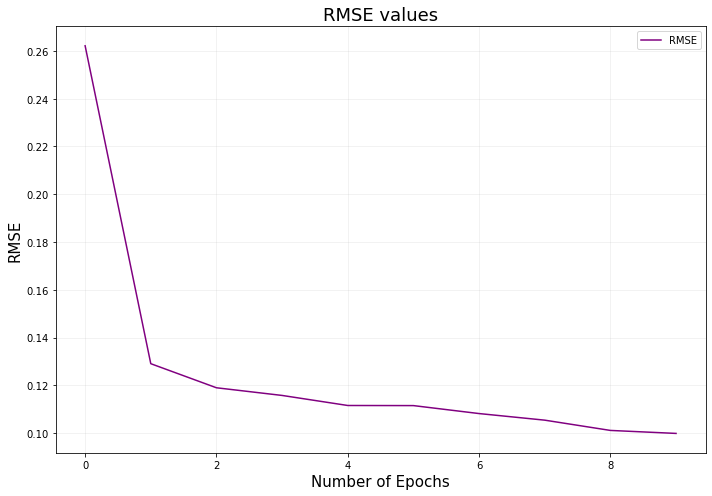

In [24]:
# to show how the rmse values are changing per iteration
plt.figure(figsize=(10,7))

plt.plot(learn.epoch, learn.history['root_mean_squared_error'], label='RMSE', color='purple')

plt.title('RMSE values', fontsize=18)
plt.xlabel('Number of Epochs', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.grid(alpha=0.2)

plt.legend()

plt.tight_layout()
plt.show()

### Preparing test data
<p>The training data was extracted from 2014 to 2019 while the test data was extracted from 2020 to 2022.</p>

In [25]:
# setting when to extract data from yahoo finance
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

In [26]:
# choosing the cryptocurrency and setting the actual prices for visuaization 
test_data = pdd.DataReader(f'{cryptocurrency}-{currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

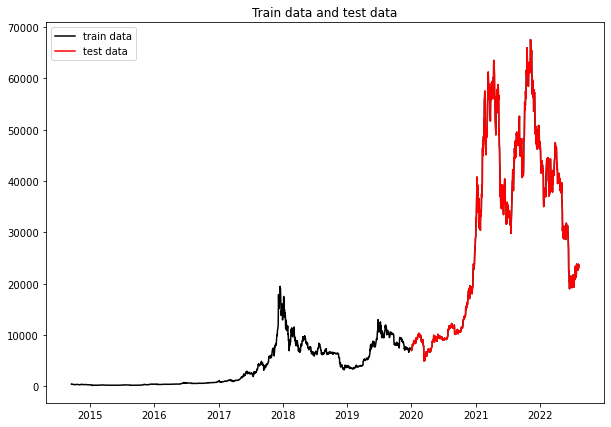

In [34]:
# showing the training data and the test data
plt.figure(figsize=(10,7))
plt.plot(data['Close'], label='train data', color='black')
plt.plot(test_data['Close'], label='test data',color='red')
plt.title('Train data and test data')
plt.legend()
plt.show()

In [28]:
# scaling and transforming the data to be used
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [29]:
x_test = []

In [30]:
# reshaping the test data to fit the LSTM model
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Visualizing Model Prediction

In [31]:
# making predictions using the LSTM model
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

30/30 [==============================] - 1s 13ms/step


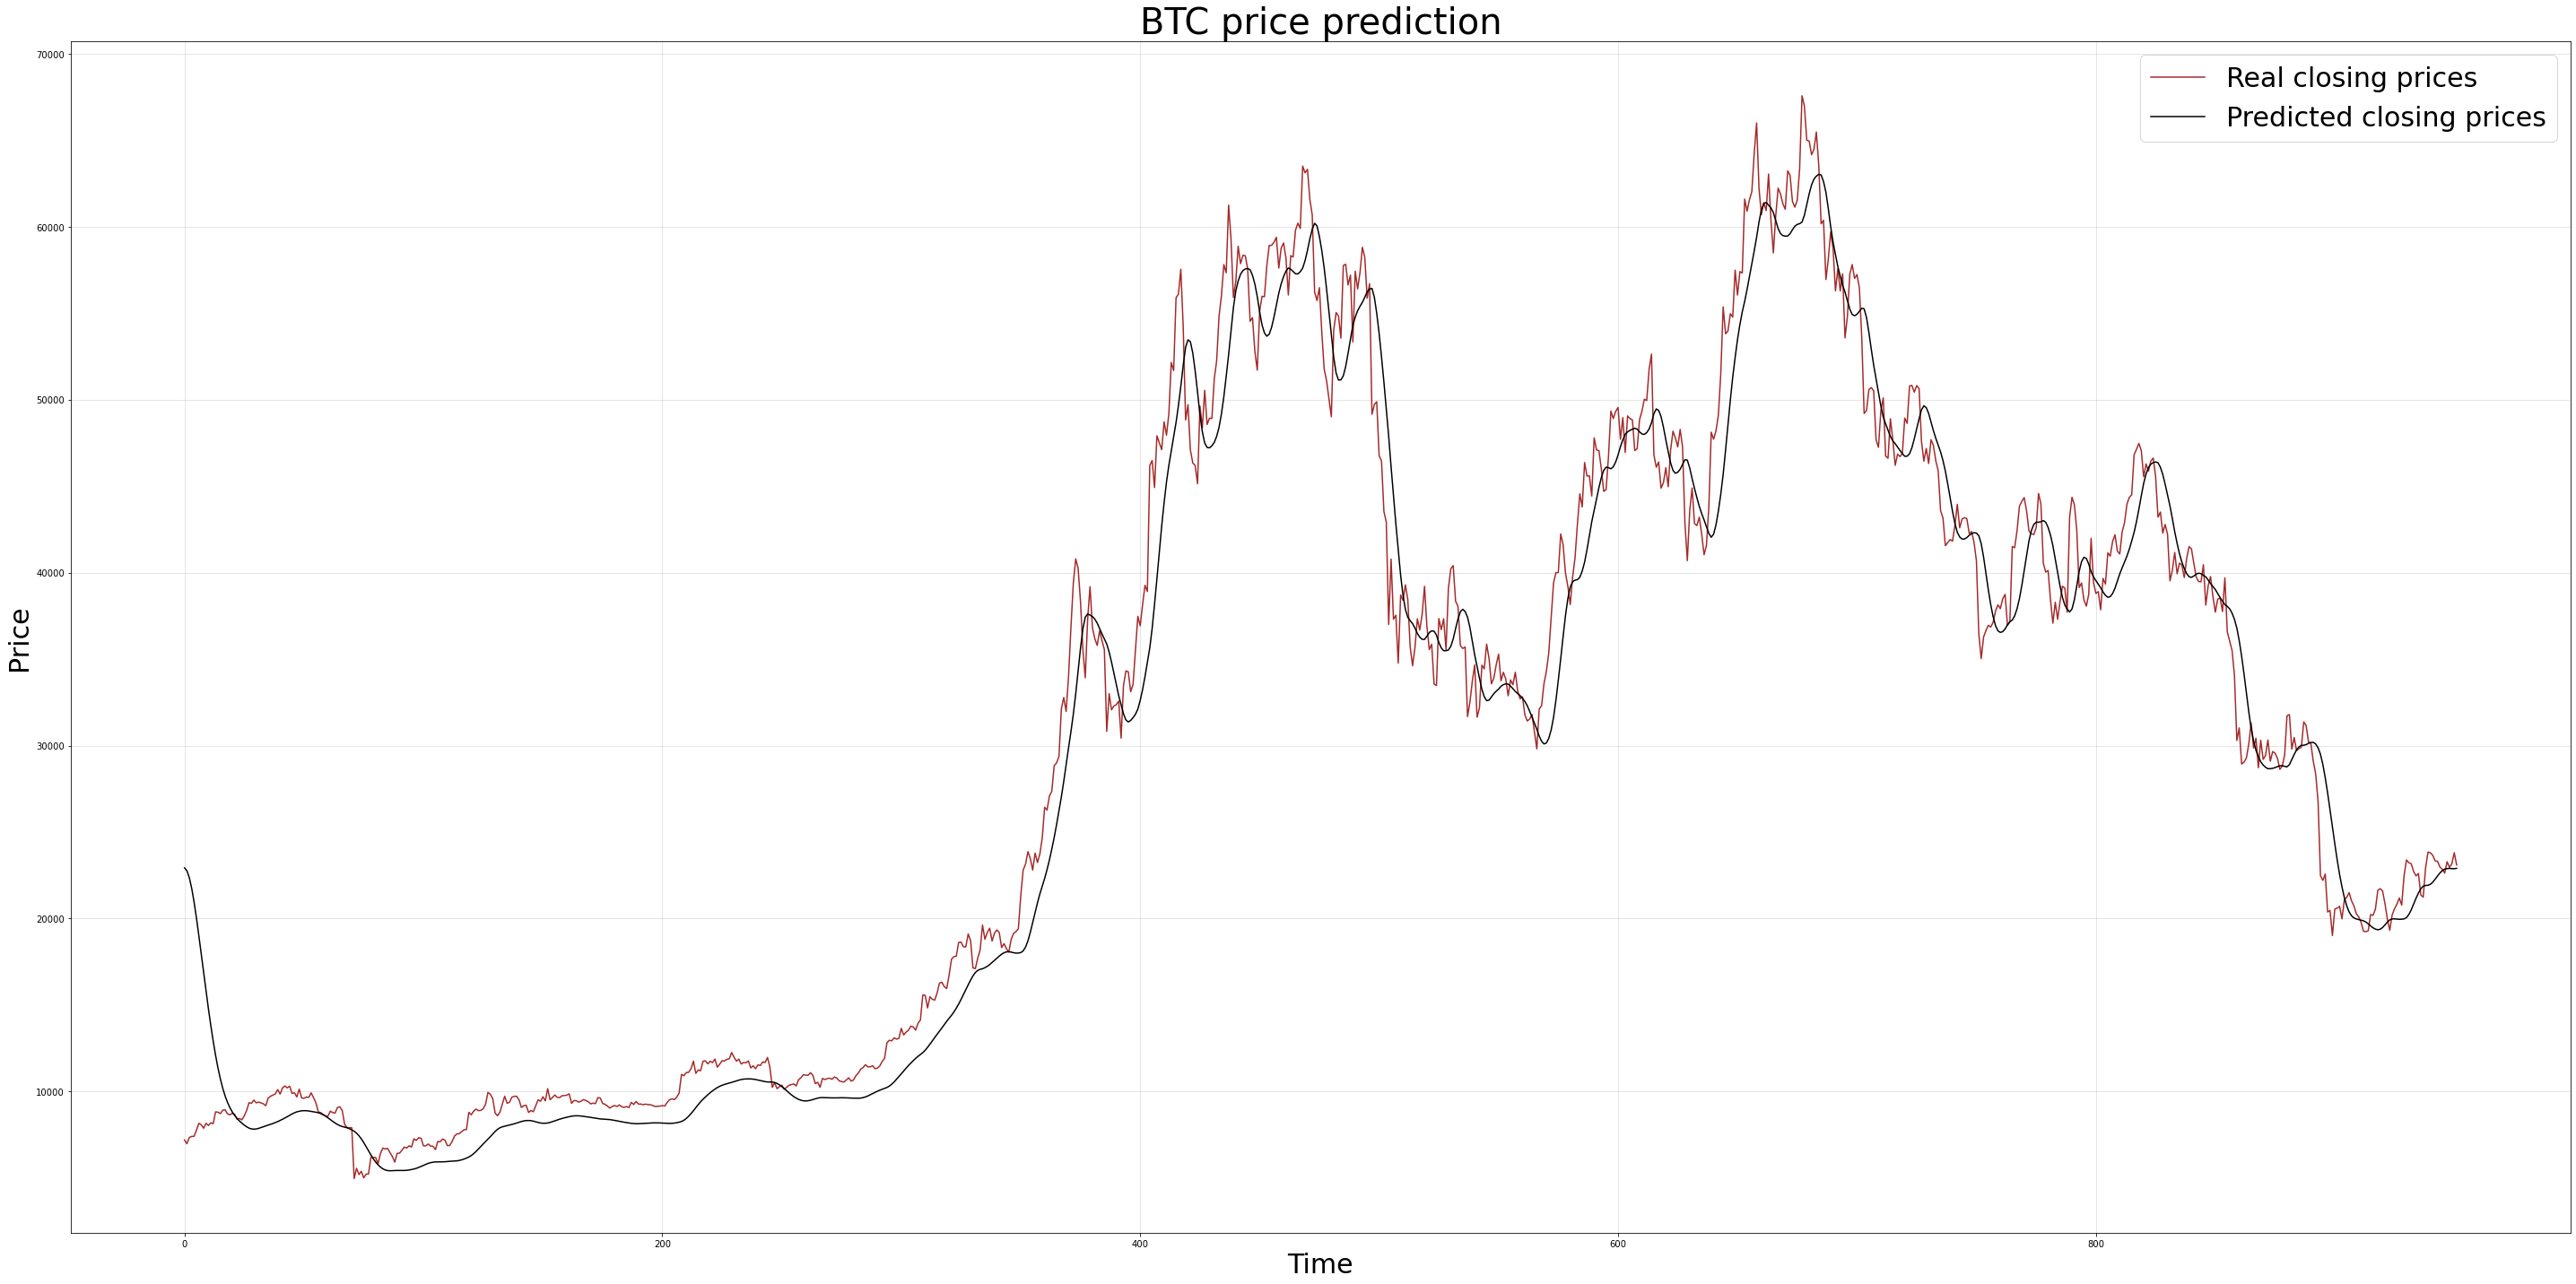

In [32]:
# Plotting the predicted prices against the actual prices to evaluate the model's performance.

plt.figure(figsize=(40,20))
plt.plot(actual_prices, color='brown', label='Real closing prices')
plt.plot(prediction_prices, color='black', label='Predicted closing prices')

plt.title('BTC price prediction', fontsize=40)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.legend(fontsize=30)
plt.grid(alpha=0.4)


plt.tight_layout()
plt.show()

# double click image for an enlarged view and double click again to revert to normal size

### Accuracy Score

In [33]:
# determining the R2 score (accuracy)
acc = r2(actual_prices, prediction_prices)
print(f'R2 Score: {acc*100:.2f}%')

R2 Score: 97.08%


<h5>Result</h5>
<p> From this analyis, it's safe to say the LSTM model's performance was good and can be used for making subsequent predictions.</p>